## Caso de uso:

- El archivo txt no tiene cabeceras de columna

- Valores perdidos

- Salida  

    - Cuaderno Jupyter

    - Descripción del análisis
    
    - **Fecha límite: domingo 27**


## Para realizar un análisis de datos de un archivo de texto se realizo lo siguiente:


- Importacion de las librerías necesarias como pandas, numpy, matplotlib, o cualquier otra librería para el análisis de datos. 

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [82]:
# Abrir el fichero de entrada en modo lectura
with open('data/SN_d_tot_V2.0.txt', 'r') as file:
    lines = file.readlines()

In [83]:
# Procesar y corregir las líneas
processed_lines = []
for line in lines:
    # Realiza las correcciones o modificaciones necesarias en cada línea
    processed_line = line.replace('*', '')  # Remove asterisks
    processed_lines.append(processed_line)

In [84]:
# Abrir el fichero de salida en modo escritura
with open('output_file.txt', 'w') as file:
    file.writelines(processed_lines)
    
print("File processing and correction completed.")

File processing and correction completed.


In [85]:
# Read the text file with tab-separated values
df = pd.read_csv('output_file.txt', delimiter='\t')
df

,1818 1 01 1818.001 -1 -1.0 0
0,1818 1 02 1818.004 -1 -1.0 0
1,1818 1 03 1818.007 -1 -1.0 0
2,1818 1 04 1818.010 -1 -1.0 0
3,1818 1 05 1818.012 -1 -1.0 0
4,1818 1 06 1818.015 -1 -1.0 0
...,...
75081,2023 07 27 2023.568 145 15.1 18
75082,2023 07 28 2023.571 164 18.6 27
75083,2023 07 29 2023.574 179 17.9 33
75084,2023 07 30 2023.577 180 16.4 36


In [86]:
# Crear columnas
df.columns = ['Columna 1']

- Exploracion del data set. 

In [87]:
df.shape #75086 Lineas y 1 columna

(75086, 1)

In [88]:
df.sample(10)

,Columna 1
26923,1891 9 19 1891.716 95 10.9 1
22313,1879 2 04 1879.095 0 2.0 1
5600,1833 5 03 1833.336 28 6.7 1
69311,2007 10 09 2007.771 0 2.0 19
23721,1882 12 13 1882.949 50 7.9 1
29172,1897 11 15 1897.873 0 2.0 1
48912,1951 12 03 1951.922 29 3.7 1
56589,1972 12 09 1972.939 59 5.1 1
26140,1889 7 28 1889.571 30 6.2 1
7675,1839 1 07 1839.018 -1 -1.0 0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75086 entries, 0 to 75085
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Columna 1  75086 non-null  object
dtypes: object(1)
memory usage: 586.7+ KB


In [91]:
df.describe().T #Solo hay una columna creada como numéricas

,count,unique,top,freq
Columna 1,75086,75086,1818 1 02 1818.004 -1 -1.0 0,1


In [92]:
df.columns

Index(['Columna 1'], dtype='object')

In [94]:
# Check the length of each column
for column in df.columns:
    column_length = len(df[column])
    print(f"Length of {column}: {column_length}")

Length of Columna 1: 75086


In [95]:
# Separar los elementos en la columna y formar nuevas columnas
df[['Gregorian Year', 'Gregorian Month', 'Gregorian Day', 'Decimal date', 'Estimated Sunspot Number', 'Estimated Standard Deviation','Number of Stations calculated']] = df['Columna 1'].str.split(expand=True)

# Mostrar el DataFrame con las nuevas columnas
df

,Columna 1,Gregorian Year,Gregorian Month,Gregorian Day,Decimal date,Estimated Sunspot Number,Estimated Standard Deviation,Number of Stations calculated
0,1818 1 02 1818.004 -1 -1.0 0,1818,1,02,1818.004,-1,-1.0,0
1,1818 1 03 1818.007 -1 -1.0 0,1818,1,03,1818.007,-1,-1.0,0
2,1818 1 04 1818.010 -1 -1.0 0,1818,1,04,1818.010,-1,-1.0,0
3,1818 1 05 1818.012 -1 -1.0 0,1818,1,05,1818.012,-1,-1.0,0
4,1818 1 06 1818.015 -1 -1.0 0,1818,1,06,1818.015,-1,-1.0,0
...,...,...,...,...,...,...,...,...
75081,2023 07 27 2023.568 145 15.1 18,2023,07,27,2023.568,145,15.1,18
75082,2023 07 28 2023.571 164 18.6 27,2023,07,28,2023.571,164,18.6,27
75083,2023 07 29 2023.574 179 17.9 33,2023,07,29,2023.574,179,17.9,33
75084,2023 07 30 2023.577 180 16.4 36,2023,07,30,2023.577,180,16.4,36


In [96]:
# Eliminar la columna original
df = df.drop('Columna 1', axis=1)


In [97]:
df

,Gregorian Year,Gregorian Month,Gregorian Day,Decimal date,Estimated Sunspot Number,Estimated Standard Deviation,Number of Stations calculated
0,1818,1,02,1818.004,-1,-1.0,0
1,1818,1,03,1818.007,-1,-1.0,0
2,1818,1,04,1818.010,-1,-1.0,0
3,1818,1,05,1818.012,-1,-1.0,0
4,1818,1,06,1818.015,-1,-1.0,0
...,...,...,...,...,...,...,...
75081,2023,07,27,2023.568,145,15.1,18
75082,2023,07,28,2023.571,164,18.6,27
75083,2023,07,29,2023.574,179,17.9,33
75084,2023,07,30,2023.577,180,16.4,36


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75086 entries, 0 to 75085
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Gregorian Year                 75086 non-null  object
 1   Gregorian Month                75086 non-null  object
 2   Gregorian Day                  75086 non-null  object
 3   Decimal date                   75086 non-null  object
 4   Estimated Sunspot Number       75086 non-null  object
 5   Estimated Standard Deviation   75086 non-null  object
 6   Number of Stations calculated  75086 non-null  object
dtypes: object(7)
memory usage: 4.0+ MB


In [99]:
df.describe().T #Solo hay seis columnas creadas como numéricas

,count,unique,top,freq
Gregorian Year,75086,206,1920,366
Gregorian Month,75086,21,10,6355
Gregorian Day,75086,31,02,2467
Decimal date,75086,75086,1818.004,1
Estimated Sunspot Number,75086,438,0,11398
Estimated Standard Deviation,75086,303,2.0,8756
Number of Stations calculated,75086,66,1,56288


In [100]:
df

,Gregorian Year,Gregorian Month,Gregorian Day,Decimal date,Estimated Sunspot Number,Estimated Standard Deviation,Number of Stations calculated
0,1818,1,02,1818.004,-1,-1.0,0
1,1818,1,03,1818.007,-1,-1.0,0
2,1818,1,04,1818.010,-1,-1.0,0
3,1818,1,05,1818.012,-1,-1.0,0
4,1818,1,06,1818.015,-1,-1.0,0
...,...,...,...,...,...,...,...
75081,2023,07,27,2023.568,145,15.1,18
75082,2023,07,28,2023.571,164,18.6,27
75083,2023,07,29,2023.574,179,17.9,33
75084,2023,07,30,2023.577,180,16.4,36


In [160]:
# Obtener estadísticas descriptivas básicas
df.describe()

,Gregorian Year,Gregorian Month,Gregorian Day,Decimal date,Estimated Sunspot Number,Estimated Standard Deviation,Number of Stations calculated
count,75086,75086,75086,75086,75086,75086,75086
unique,206,21,31,75086,438,303,66
top,1920,10,02,1818.004,0,2.0,1
freq,366,6355,2467,1,11398,8756,56288


- Visualice el número estimado de manchas solares a lo largo del tiempo:

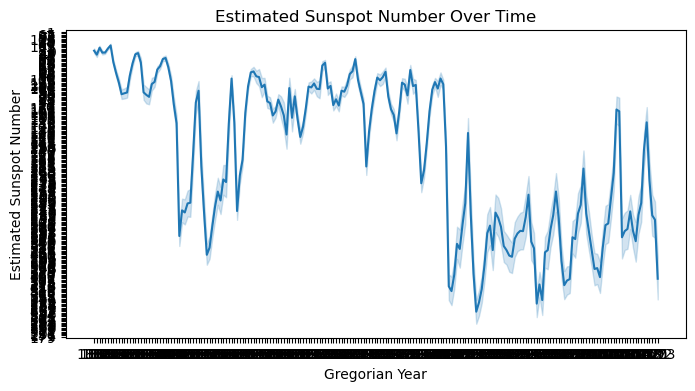

In [144]:
# Assuming your data has columns 'Year' and 'Sunspot_Number'
plt.figure(figsize=(8,4))
sns.lineplot(data=df, x='Gregorian Year', y='Estimated Sunspot Number')
plt.xlabel('Gregorian Year')
plt.ylabel('Estimated Sunspot Number')
plt.title('Estimated Sunspot Number Over Time')
plt.show()

A continuación, creamos un modelo de regresión lineal utilizando sklearn y lo ajustamos a los datos. Por último, utilizamos el modelo para predecir el número de manchas solares para los próximos años e imprimir las predicciones. 

In [163]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming you have the sunspot data in a DataFrame called 'data'
# with columns 'Year' and 'Sunspot_Number'

# Create X and y arrays for linear regression
X = df['Gregorian Year'].values.reshape(-1, 1)
y = df['Estimated Sunspot Number'].values

# Create and fit the linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict the Sunspot Number for future years
future_years = np.array([2022, 2023, 2024]).reshape(-1, 1)
predicted_sunspot_number = regression_model.predict(future_years)

In [164]:
# Print the predicted Sunspot Number
for year, sunspot_number in zip(future_years.flatten(), predicted_sunspot_number):
    print(f"Year: {year}, Predicted Sunspot Number: {sunspot_number:.2f}")

Year: 2022, Predicted Sunspot Number: 93.90
Year: 2023, Predicted Sunspot Number: 94.05
Year: 2024, Predicted Sunspot Number: 94.20
